<a href="https://colab.research.google.com/github/norgel/food-sales-predictions/blob/main/food_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Food Sales Predictions
Nicholas Orgel

08/24/2022



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.info()
# There are 12 columns, and 8,523 rows
# 4 float64 types, 1 int64 type, and 7 object types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
# There are no duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()
# Item_Weight has 1463 missing values
# Outlet_Size has 2410 missing values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

###Item_Weight = numerical .mean()

###Outlet_Size = categorical .mode()

In [7]:
iw_mean = df['Item_Weight'].mean()
iw_mean

12.857645184135976

In [8]:
os_mode = df['Outlet_Size'].mode()
os_mode

0    Medium
dtype: object

In [9]:
# Filling in missing values for Item_Weight
df['Item_Weight']= df['Item_Weight'].fillna(iw_mean)

In [10]:
# Filling in missing values for Outlet_Size
df['Outlet_Size']= df['Outlet_Size'].fillna('Medium')

In [11]:
# Checking if all columns contain no missing values
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
df.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


### Searching For Any Errors

In [13]:
df['Item_Identifier'].value_counts()
# No Errors Detected

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [14]:
df['Item_Fat_Content'].value_counts()
# ERROR DETECTED
# 5 different variable names
# Replace LF and low fat with Low Fat, reg with Regular

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [15]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()
# NO MORE ERRORS

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [16]:
df['Item_Type'].value_counts()
# No Errors Detected

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [17]:
df['Outlet_Identifier'].value_counts()
# No Errors Detected

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [18]:
df['Outlet_Size'].value_counts()
# No Errors Detected

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [19]:
df['Outlet_Location_Type'].value_counts()
# No Errors Detected

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [20]:
df['Outlet_Type'].value_counts()
# No Errors Detected

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

### Summary Statistics for Numerical Data Types (int64 & float64)
- Rounded up

In [21]:
df['Item_Weight'].describe(include='all').round()
# Summary for Item_Weight

count    8523.0
mean       13.0
std         4.0
min         5.0
25%         9.0
50%        13.0
75%        16.0
max        21.0
Name: Item_Weight, dtype: float64

In [22]:
df['Item_MRP'].describe(include='all').round()
# Summary for Item_MRP

count    8523.0
mean      141.0
std        62.0
min        31.0
25%        94.0
50%       143.0
75%       186.0
max       267.0
Name: Item_MRP, dtype: float64

In [23]:
df['Outlet_Establishment_Year'].describe(include='all').round()
# Summary for Outlet_Establishment_Year

count    8523.0
mean     1998.0
std         8.0
min      1985.0
25%      1987.0
50%      1999.0
75%      2004.0
max      2009.0
Name: Outlet_Establishment_Year, dtype: float64

In [24]:
df['Item_Outlet_Sales'].describe(include='all').round()
# Summary for Item_Outlet_Sales

count     8523.0
mean      2181.0
std       1706.0
min         33.0
25%        834.0
50%       1794.0
75%       3101.0
max      13087.0
Name: Item_Outlet_Sales, dtype: float64

Create a histogram, boxplot, and heatmap
Histogram and Boxplot uses numerical dtypes
Heatmap uses entire df, but only shows numerical data
- Use Item_Outlet_Sales for Histogram and Boxplot

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

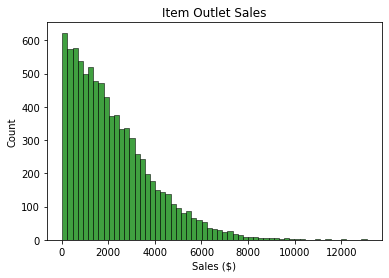

In [26]:
sns.histplot(df['Item_Outlet_Sales'], label = 'Sales', color = 'green');
plt.xlabel('Sales ($)')
plt.ylabel('Count')
plt.title('Item Outlet Sales');
# Histogram of Item_Outlet_Sales

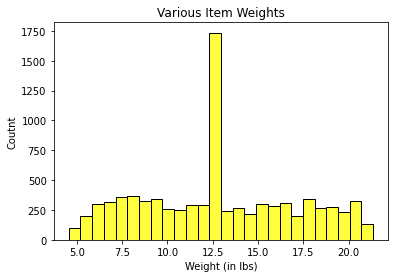

In [27]:
sns.histplot(df['Item_Weight'], label = 'Sales', color = 'yellow');
plt.xlabel('Weight (in lbs)')
plt.ylabel('Coutnt')
plt.title('Various Item Weights');

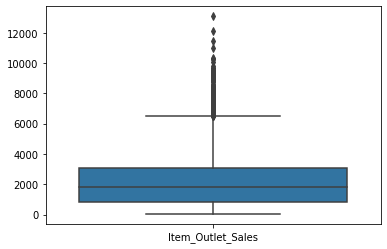

In [28]:
# Boxplot of Item_Outlet_Sales
sns.boxplot(data=df.loc[:,['Item_Outlet_Sales']]);

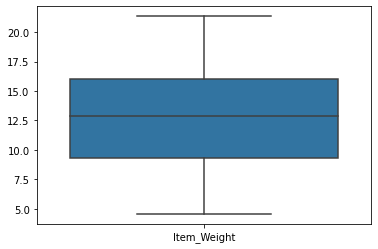

In [29]:
sns.boxplot(data=df.loc[:,['Item_Weight']]);
# Boxplot of Item_Weight

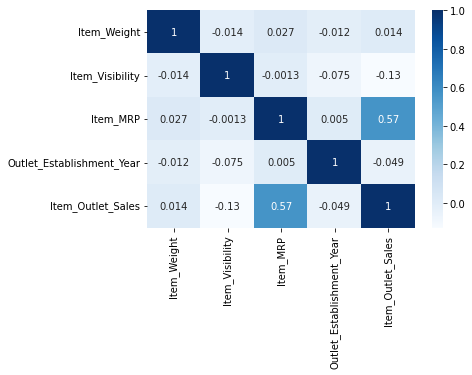

In [30]:
# Heatmap of all the data
df=pd.read_csv('/content/sales_predictions.csv')
corr=df.corr()
sns.heatmap(corr,cmap ='Blues', annot = True);

In [31]:
df = pd.read_csv('/content/linearRegPredicted.csv')
df.head()

,feature,actual,predicted
0,0.000000,-51.000000,-50.991193
1,25.000000,-12.000000,-11.399052
2,117.583220,134.907414,135.223663
3,108.922466,134.085179,121.507752
4,96.839983,114.530638,102.372896


In [32]:
df=pd.read_csv('/content/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


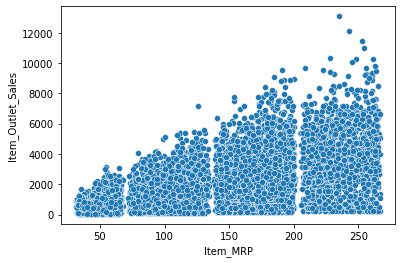

In [33]:
sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales');

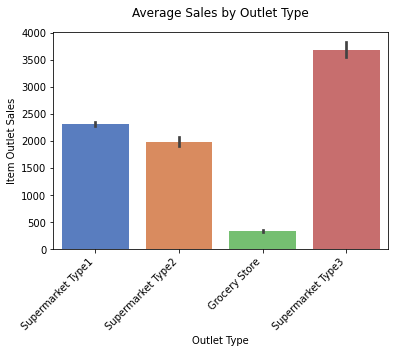

In [38]:
ax = sns.barplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales',
                 palette='muted')
ax.set_xticklabels( ax.get_xticklabels(), rotation=45,ha='right');

ax.set_title('Average Sales by Outlet Type',
             pad=15)

ax.set_ylabel(ax.get_ylabel().replace('_',' ').title())
ax.set_xlabel(ax.get_xlabel().replace('_',' ').title());